In [73]:
from IPython.display import YouTubeVideo
YouTubeVideo('35unQgSaT88')

In [74]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'sherif'
rcParams['font.size']=16

In [75]:
def density_green_light(nx, density_light):
    
    density= numpy.arange(nx)*2/nx*density_light
    density[(nx-1)/2:]=0 #sets the nx cells after the halfway point to zero
    
    return density

above code computes the initial condition at the green light. Enter paramaters for nx (grid points in x), and density_light (density of cars at the light). density is an array, function returns an array.

In [76]:
#initial conditions:

nx=81
nt=30
dx=4.0/(nx-1)

x=numpy.linspace(0,4,nx)

density_max = 10
speed_max=1
density_light=10

DENSITY=density_green_light(nx, density_light)

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


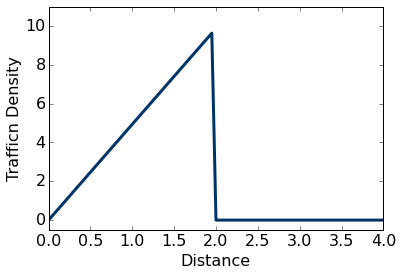

In [77]:
pyplot.plot(x, DENSITY, color='#003366', ls='-', lw=3)
pyplot.ylabel('Trafficn Density')
pyplot.xlabel('Distance')
pyplot.ylim(-.5, 11);

Below is code to define the traffic flux, that we will need for our conservation equation and will be calculated in each time step of our numerical solution: Flux=Vmax*(Density)

In [78]:
def Calculate_Flux(speed_max,density_max, DENSITY):
    
    return speed_max*DENSITY*(1-DENSITY/density_max) 

In [79]:
def forward_time_backward_space(DENSITY, nt, dt, dx, density_max, speed_max):
    
    density_n= numpy.zeros((nt, len(DENSITY))) # created an nt by rholength matrix-array
    
    density_n[0:]=DENSITY.copy() #copies the DENSITY array into each row of the matrix array
    
    for t in range (1, nt):
       
        Flux=Calculate_Flux(speed_max, density_max,DENSITY)
        
        density_n[t,1:] = DENSITY[1:] - dt/dx*(Flux[1:]-Flux[:-1])
        
        density_n[t,0] = DENSITY[0]
        
        DENSITY=density_n[t].copy()
        
    return density_n
    

In [80]:
sigma= 1
dt=sigma*dx

DENSITY_n = forward_time_backward_space(DENSITY, nt, dt, dx, density_max, speed_max)

Below code imports stuff from JSAnimation

In [81]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation



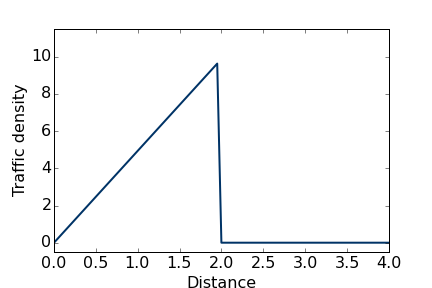
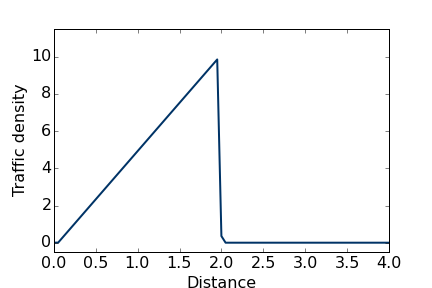
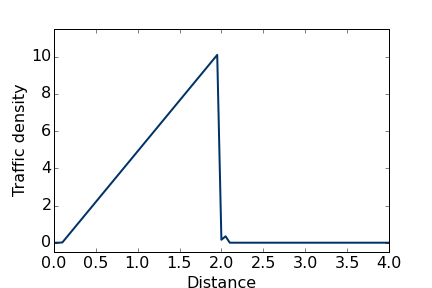
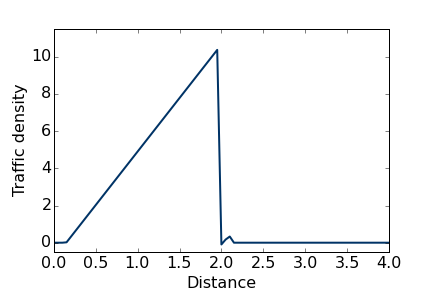
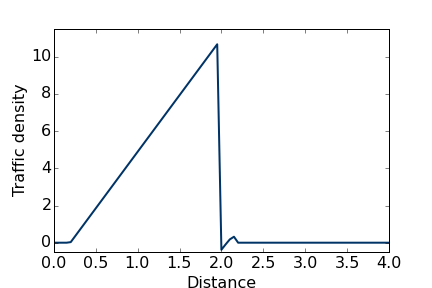
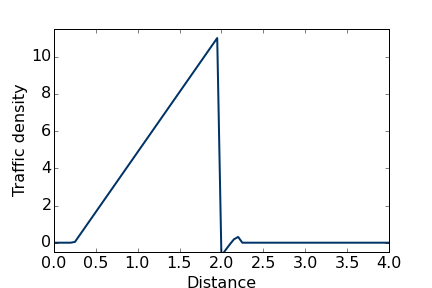
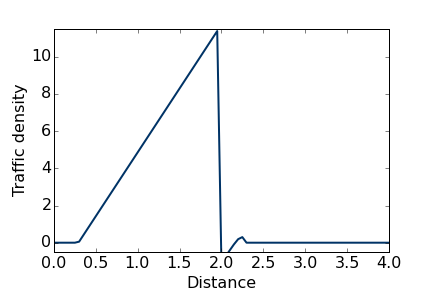
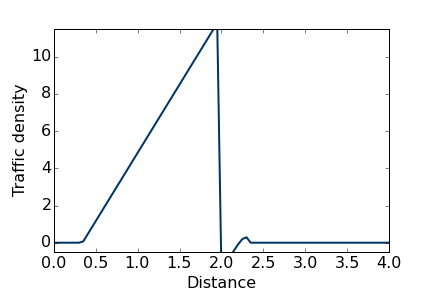
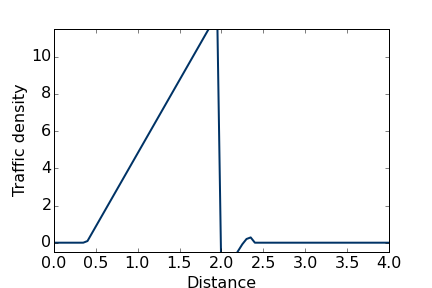
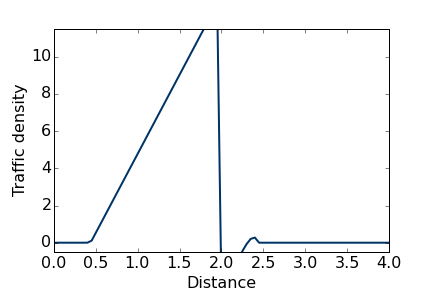
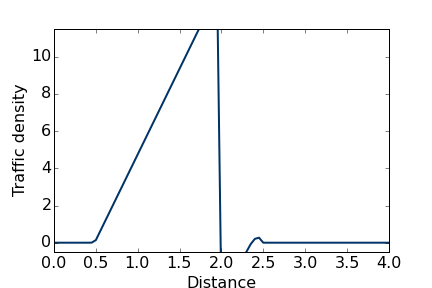
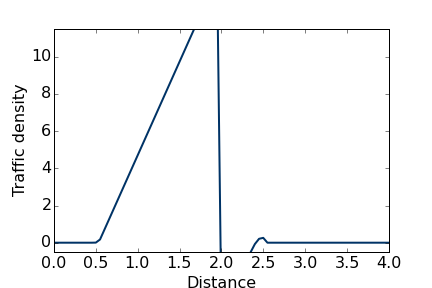
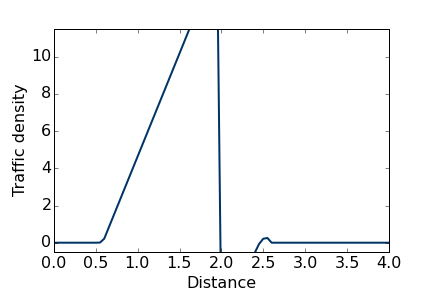
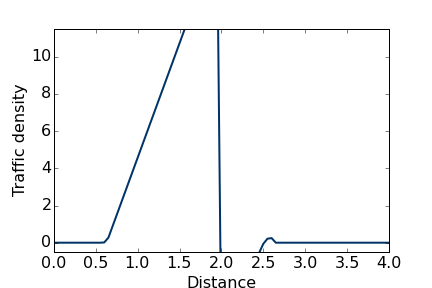
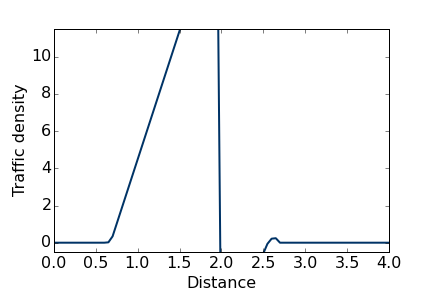
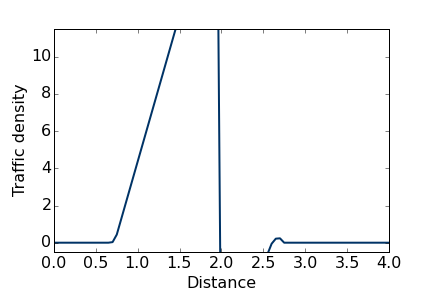
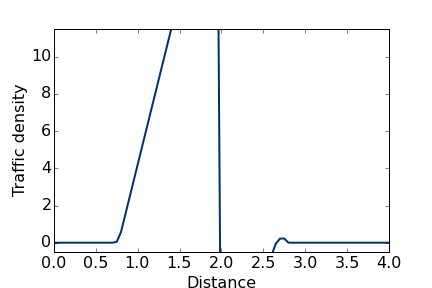
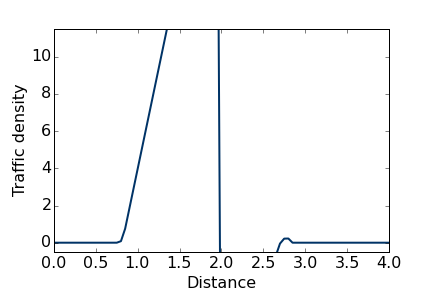
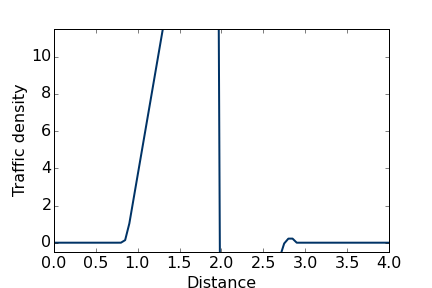
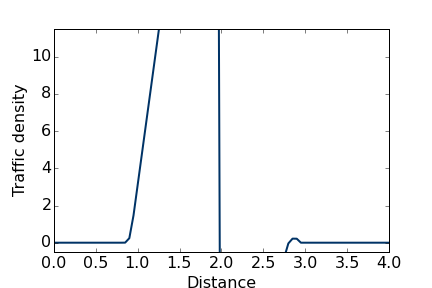
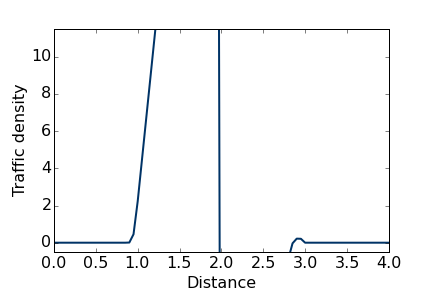
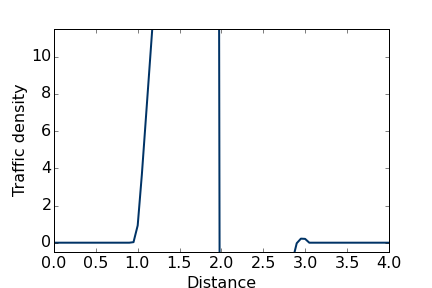
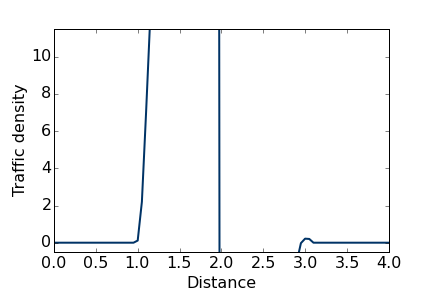
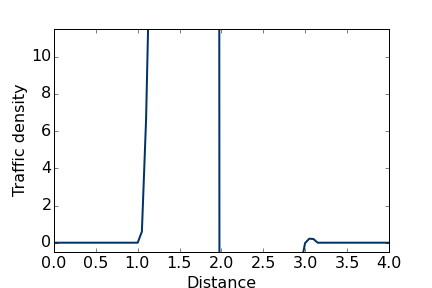
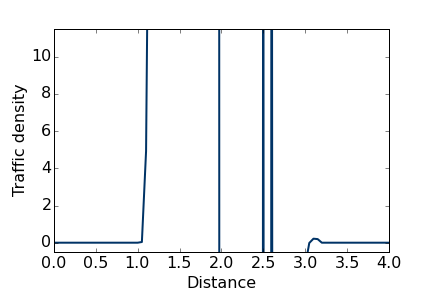
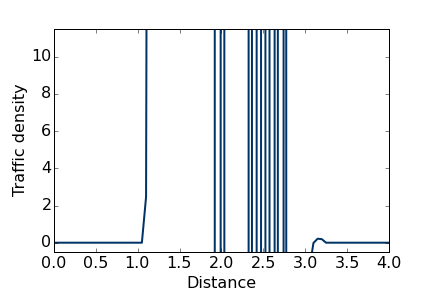
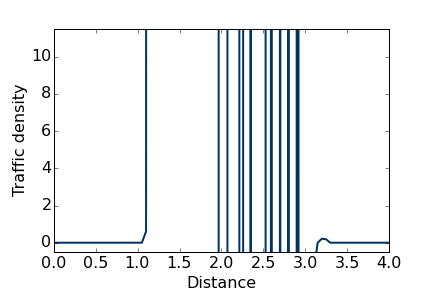
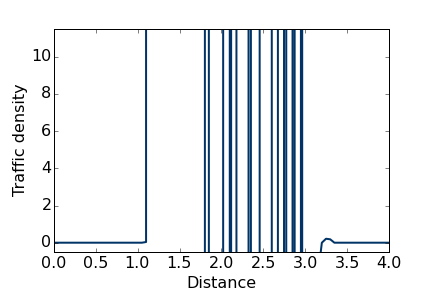
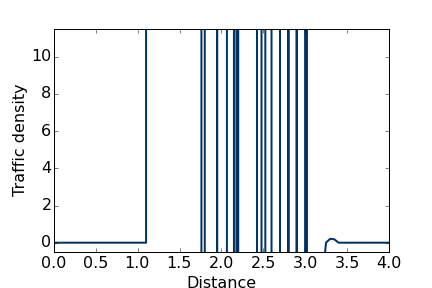
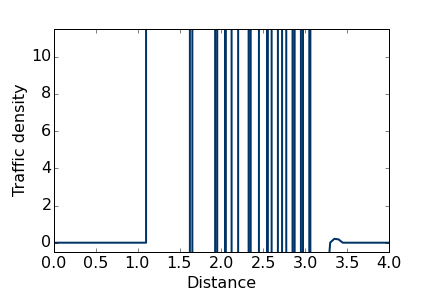

In [82]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n, interval=50)
display_animation(anim, default_mode='once')

New intitial conditions

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



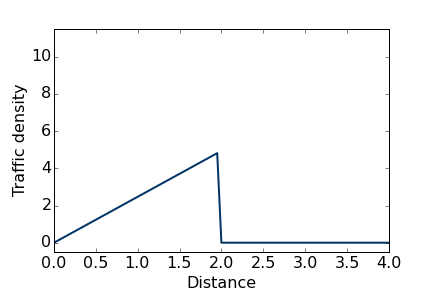
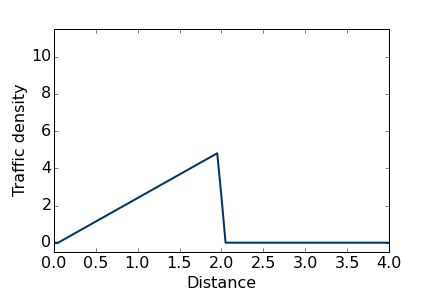
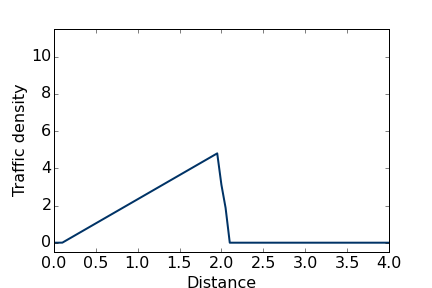
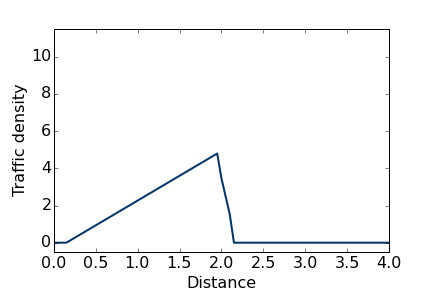
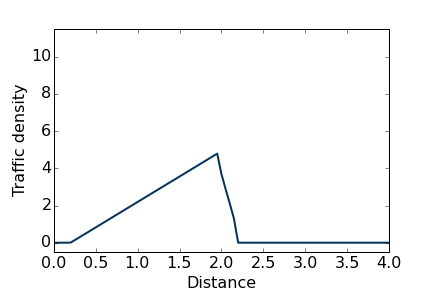
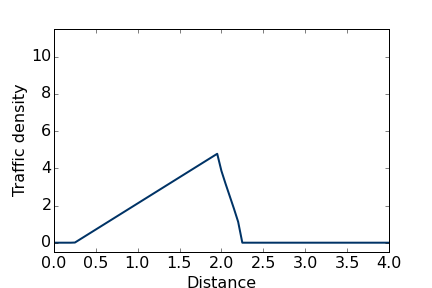
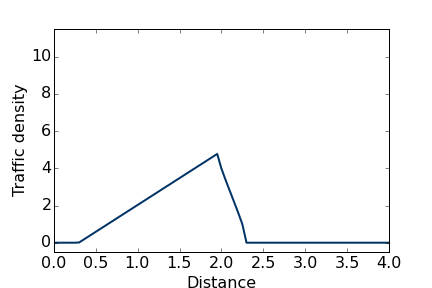
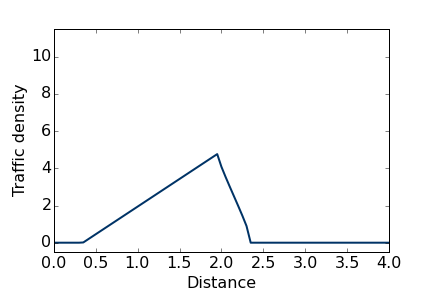
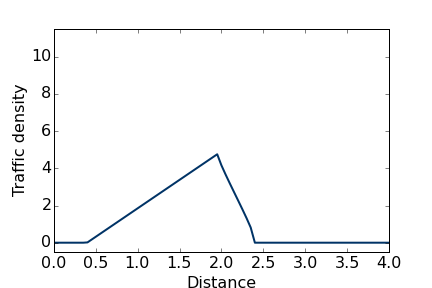
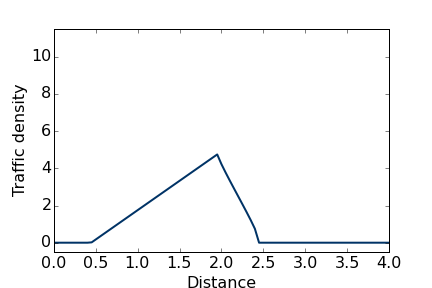
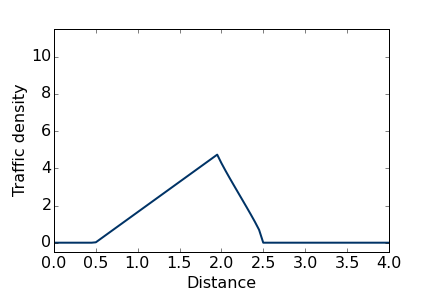
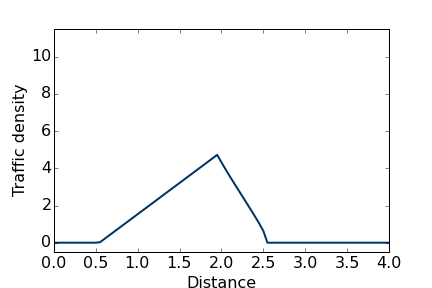
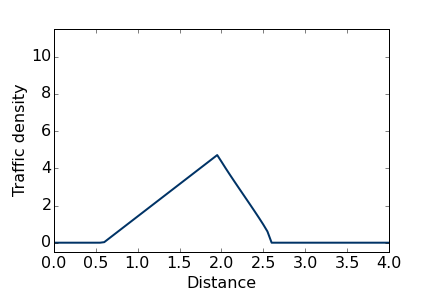
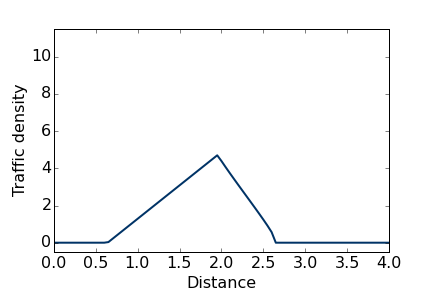
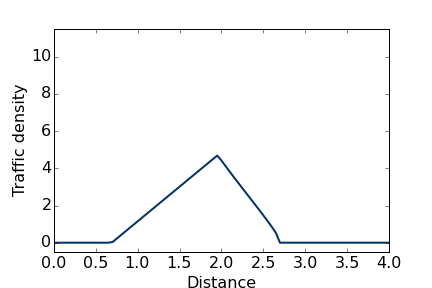
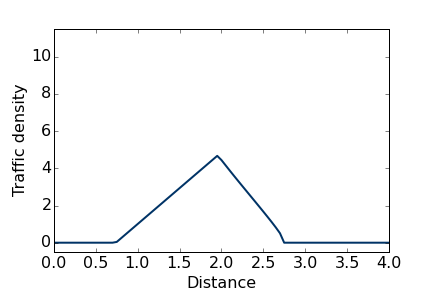
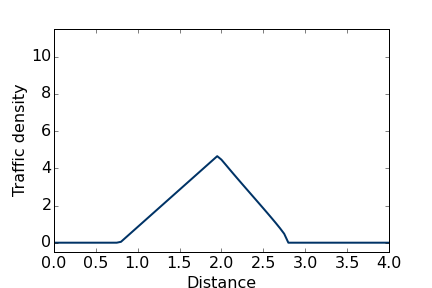
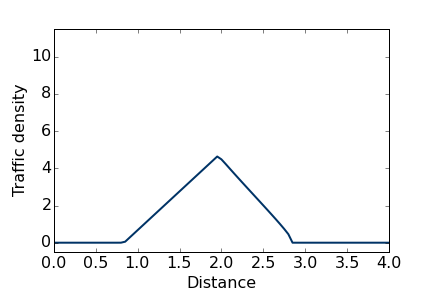
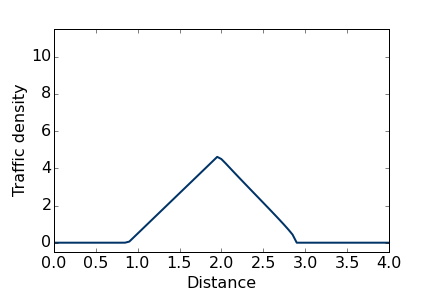
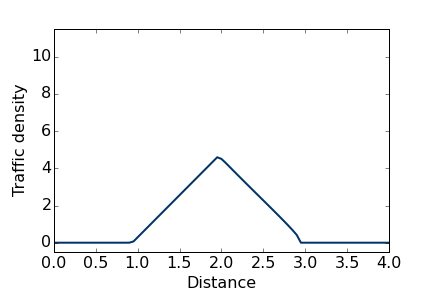
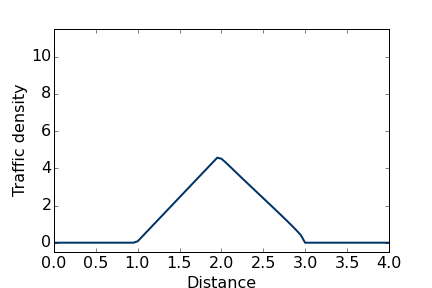
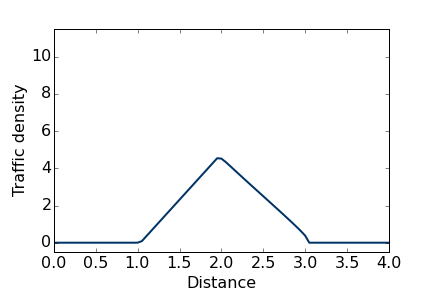
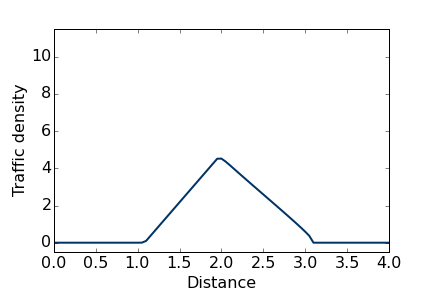
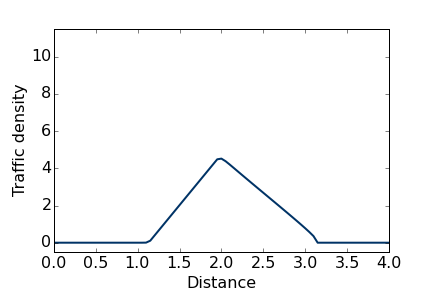
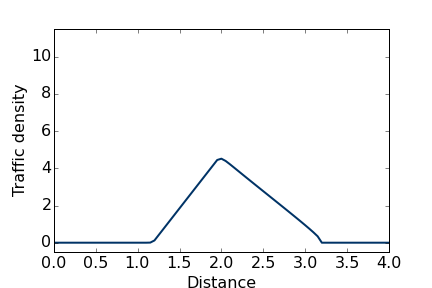
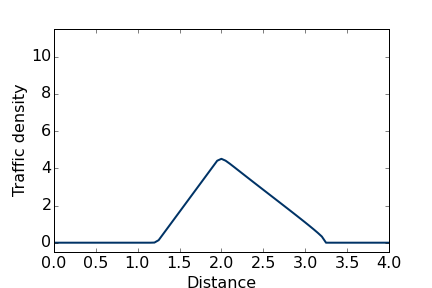
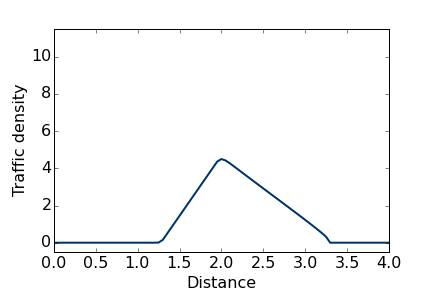
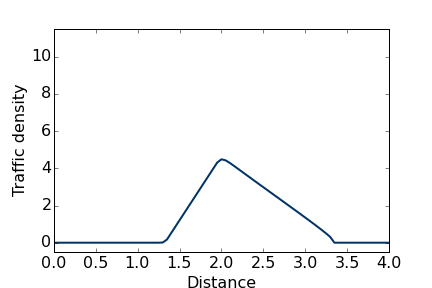
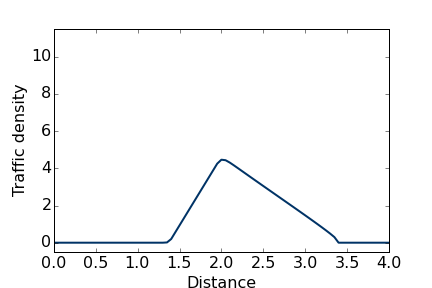
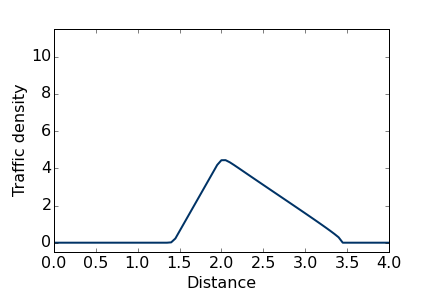
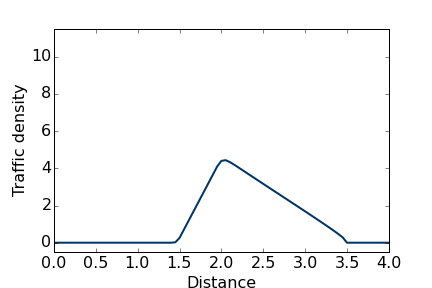
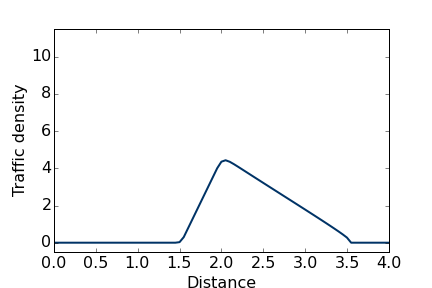
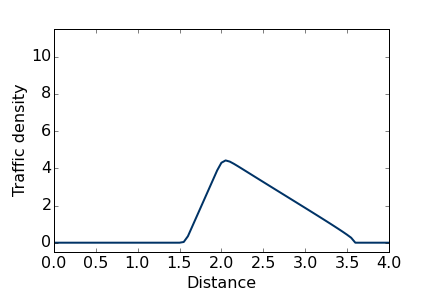
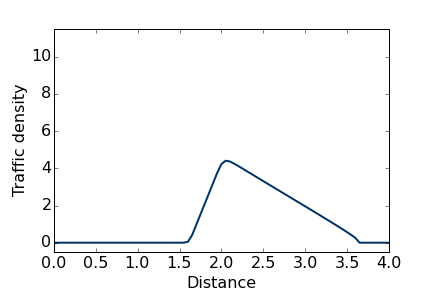
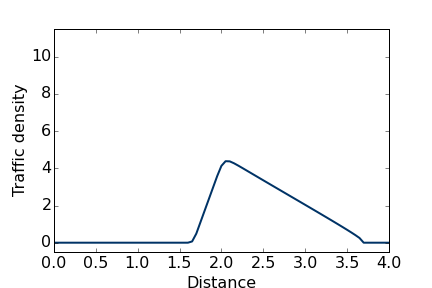
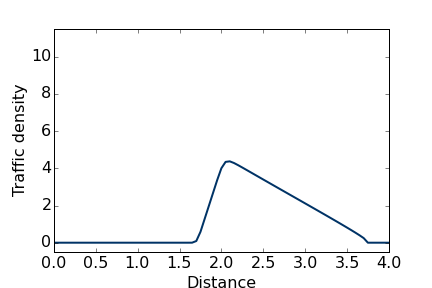
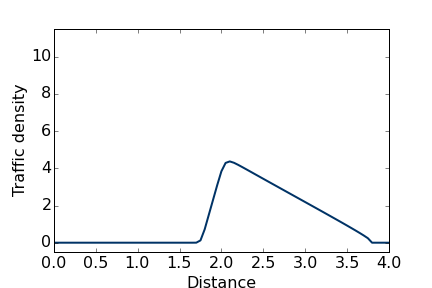
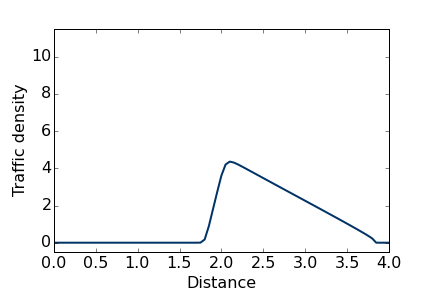
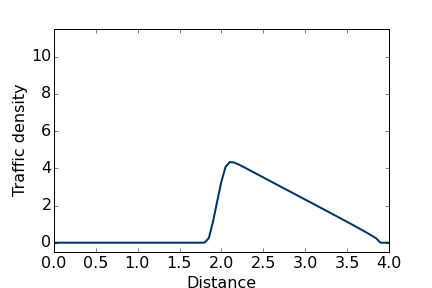
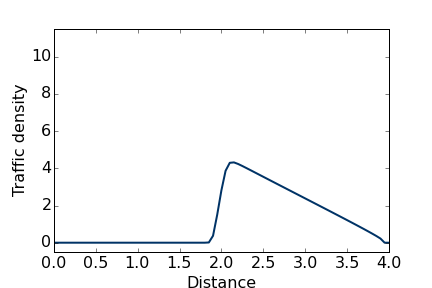

In [83]:
density_light = 5.
nt = 40
DENSITY = density_green_light(nx, density_light)
DENSITY_n = forward_time_backward_space(DENSITY, nt, dt, dx, density_max, speed_max)

anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n, interval=50)
display_animation(anim, default_mode='once')

new intitial conditions


C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



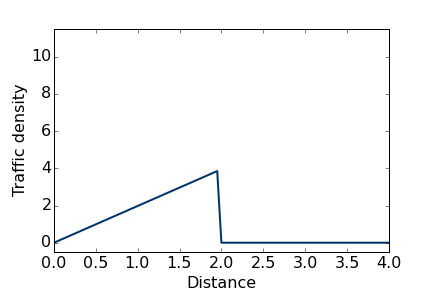
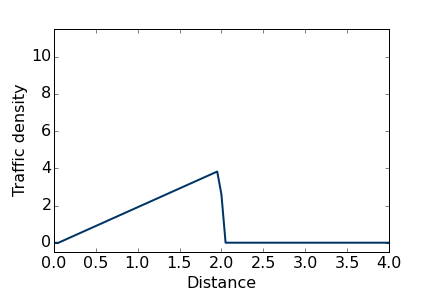
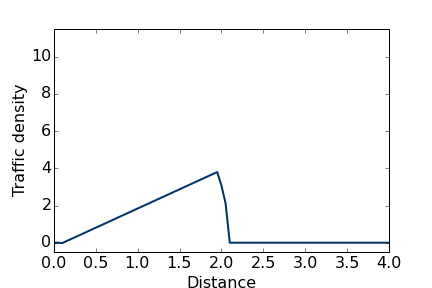
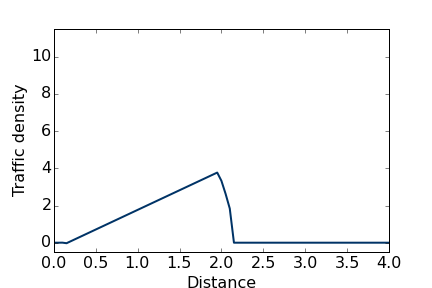
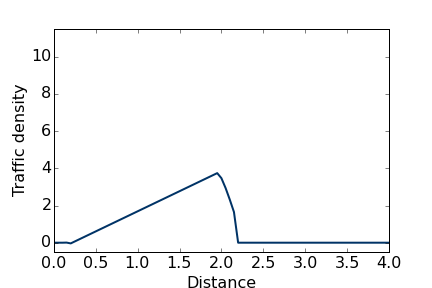
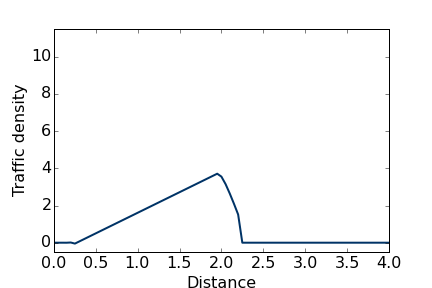
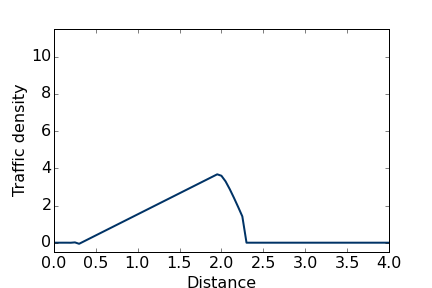
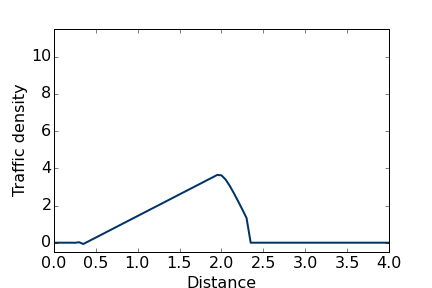
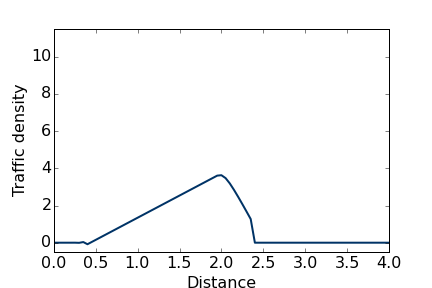
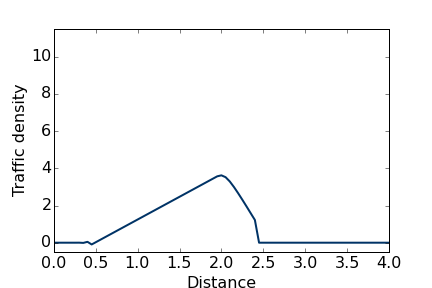
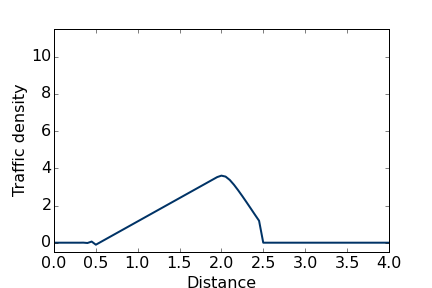
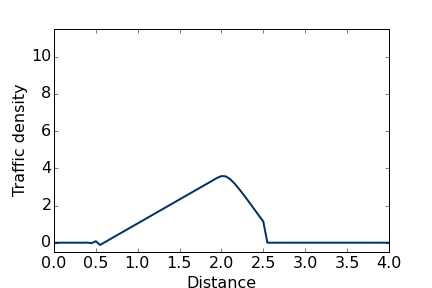
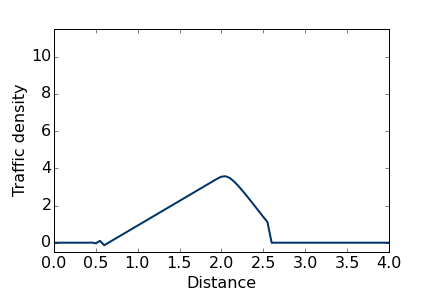
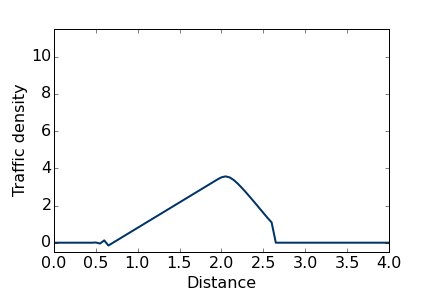
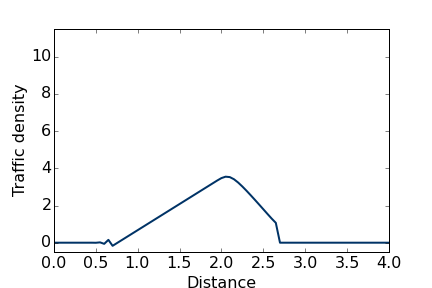
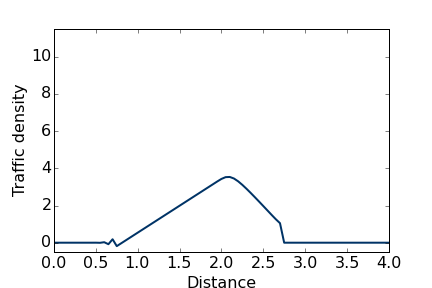
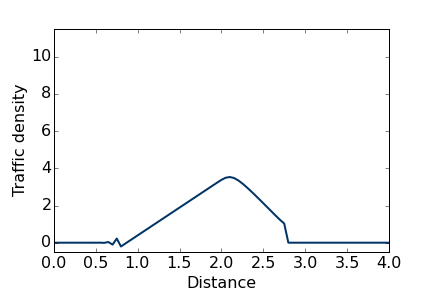
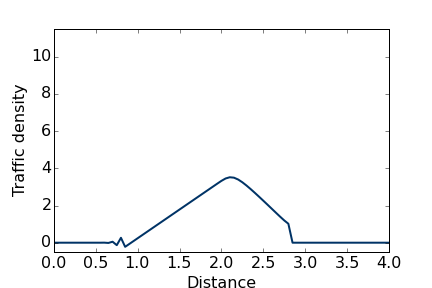
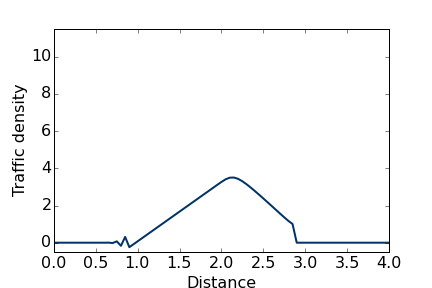
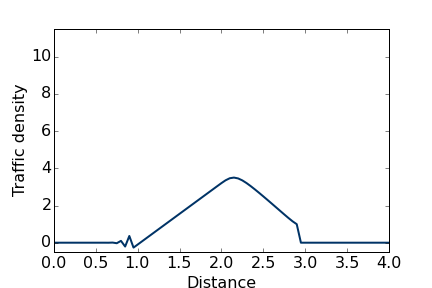
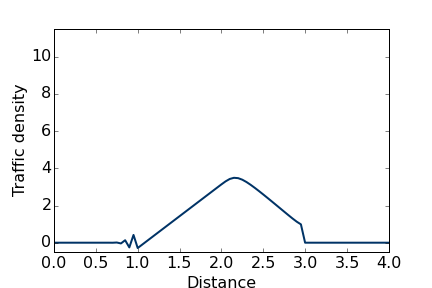
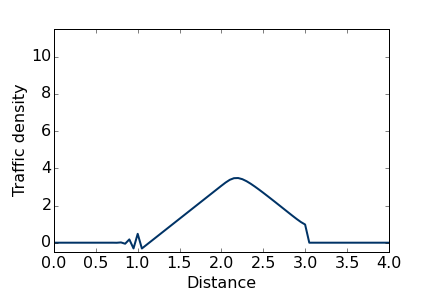
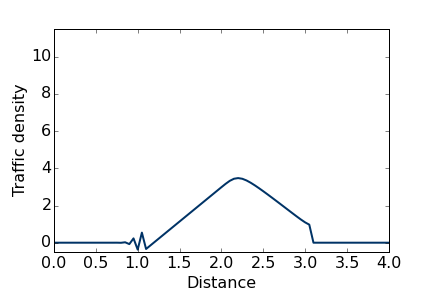
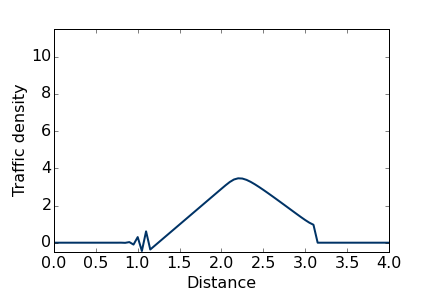
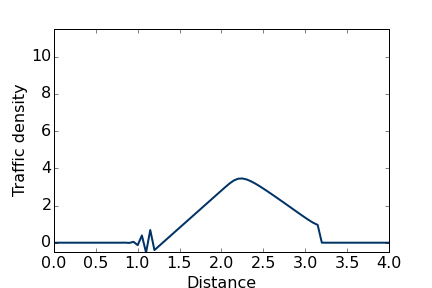
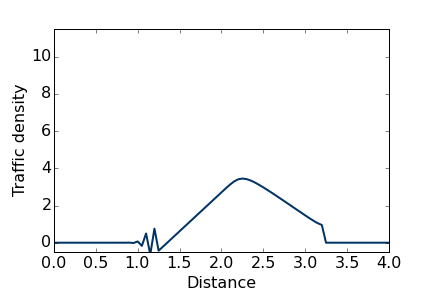
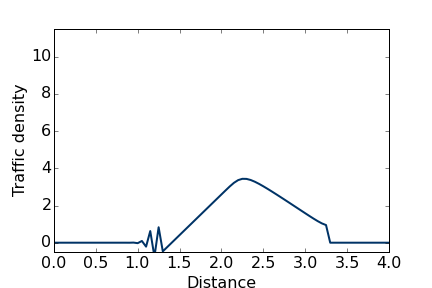
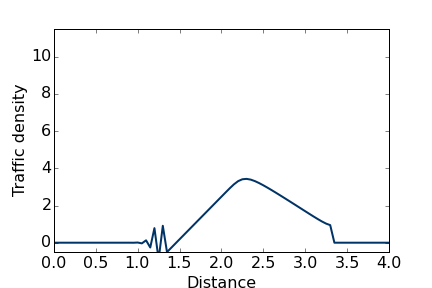
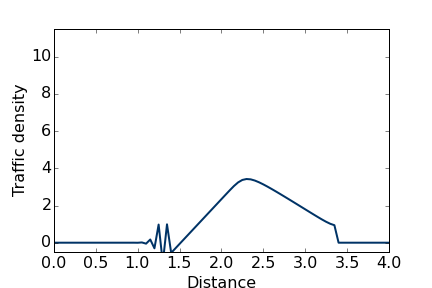
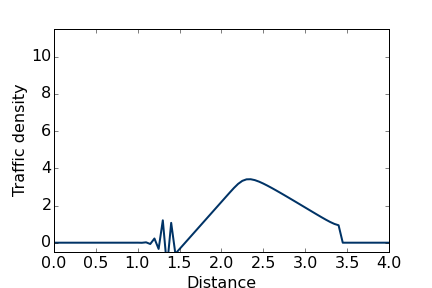
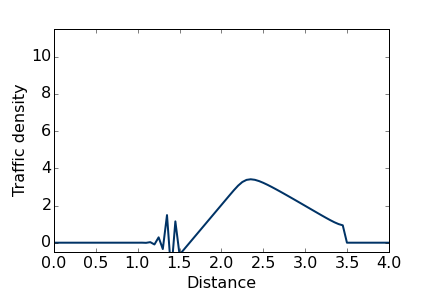
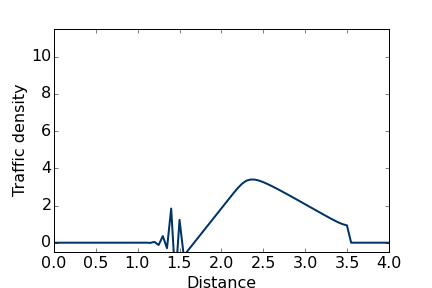
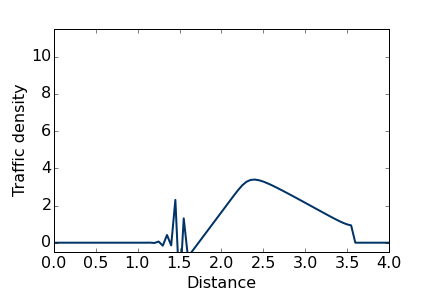
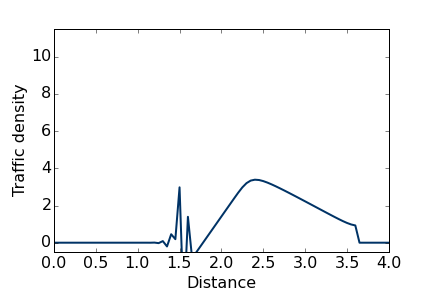
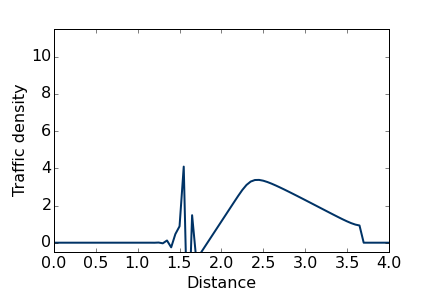
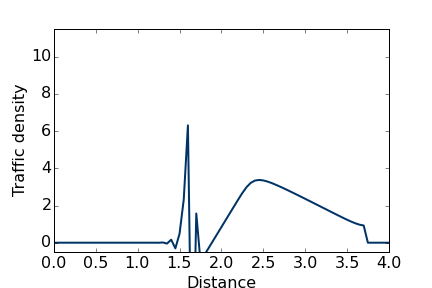
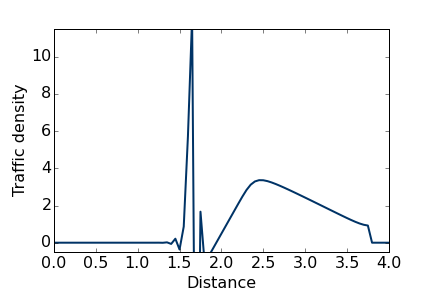
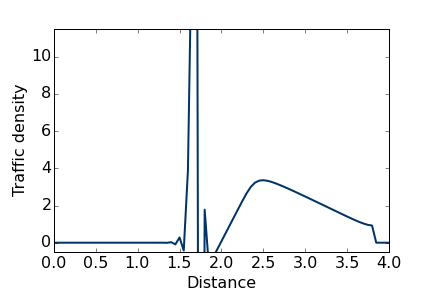
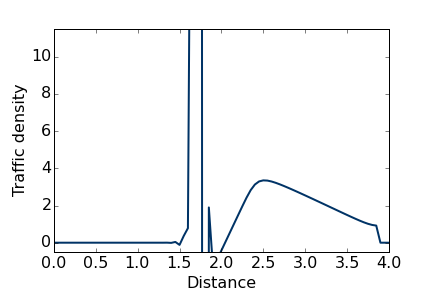
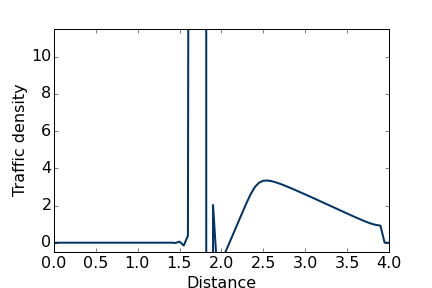

In [85]:
density_light=4
speed_max=1.1
nt=40
DENSITY= density_green_light(nx, density_light)
DENSITY_n=forward_time_backward_space(DENSITY, nt, dt, dx, density_max, speed_max)

anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n, interval=50)
display_animation(anim, default_mode='once')

In [86]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())